### Day 1 
##### Problem 1: Find the two entries in your expenses list that sum to 2020 and then multiply those two numbers together and return the result

In [29]:
def process_expenses_brute_force(expenses):
    for i in range(len(expenses)-1):
        for j in range(i+1, len(expenses)):
            if expenses[i] + expenses[j] == 2020:
                return expenses[i] * expenses[j]    
    return None

In [30]:
def process_expenses(expenses):
    existence = set()
    for x in expenses:
        if x >=2020:
            continue
        elif 2020 - x in existence:
            return x * (2020 - x)
        else:
            existence.add(x)


In [31]:
f = open("../data/expenses.txt", "r")
expenses = [int(i) for i in f.readlines()]
process_expenses(expenses)

866436

##### Problem 2: what is the product of the three entries that sum to 2020?

In [57]:
def process_expenses2(expenses):
    for i in range(len(expenses)-2):
        for j in range(i+1, len(expenses)-1):
            for k in range(j, len(expenses)):
                if expenses[i] + expenses[j] + expenses[k]== 2020:
                    return expenses[i] * expenses[j] * expenses[k]    
    return None

In [58]:
f = open("../data/expenses.txt", "r")
expenses = [int(i) for i in f.readlines()]
process_expenses2(expenses)

276650720

### Day 2
##### Problem 1: You are given a list of passwords and some policies for their validity. The policy is interpreted as the number of letters allowed in the passwords. How many passwords are valid according to their policies?

In [1]:
def read_passwords(file_name):
    f = open(file_name, "r")
    
    password_policies = []
    for string in f.readlines():
        data = string.split(" ")
        num1 = int(data[0].split("-")[0])
        num2 = int(data[0].split("-")[1])
        letter = data[1][0]
        password = data[2].rstrip('\n')
        password_policies += [(num1, num2, letter, password)]
    return password_policies

In [2]:
def password_validity(password_policies):
    invalid_passwords = 0
    for lower_limit, upper_limit, letter, password in password_policies:
        count = 0
        for i, pass_letter in enumerate(password):
            if pass_letter == letter:
                count+=1
            if count > upper_limit or count + len(password) - i -1< lower_limit:
                invalid_passwords +=1
                break
        
    return len(password_policies) - invalid_passwords

In [3]:
password_policies = read_passwords("../data/password_policies.txt")
print(password_validity(password_policies))

483


##### Problem 2: The policy was wrong before. The new policy asks that the letter can not be simultaneously present or absent in two positions.

In [4]:
def password_validity_correct(password_policies):
    valid_passwords = 0
    for loc1, loc2, letter, password in password_policies:
        if bool(password[loc1-1] == letter) != bool(password[loc2-1] == letter) :
            valid_passwords+=1

    return valid_passwords

In [5]:
password_policies = read_passwords("../data/password_policies.txt")
print(password_validity_correct(password_policies))

482


### Day 3
##### Problem 1: You are given a map of trees and open space and need to traverse it from top (left to bottom).  Toy can move in angles that are rational numbers (i.e. you can only move exactly on each node in the grid). You start by moving to the node 3 positions to the right and 1 down of where you are. How many trees will you encounter before reaching the bottom of the map?

In [1]:
def read_tree_map(file_name):
    f = open(file_name, "r")
    
    tree_map = []
    for string in f.readlines():
        tree_map.append(string.rstrip('\n'))
    return tree_map

In [2]:
def count_trees(tree_map, step):
    trees_encountered = 0
    for row in range(0, len(tree_map), step[1]):
        if tree_map[row][(step[0]*row//step[1])%len(tree_map[row])] == '#':
            trees_encountered+=1
            
    return trees_encountered
        
        

In [3]:
tree_map = read_tree_map("../data/tree_map.txt")
count_trees(tree_map, (3,1))

284

##### Problem 2: What do you get if you multiply together the number of trees encountered on each of the listed slopes?
- Right 1, down 1
- Right 3, down 1
- Right 5, down 1
- Right 7, down 1
- Right 1, down 2


In [54]:
steps = [(1,1), (3,1), (5,1), (7,1), (1,2)]
product = 1
for step in steps:
    product *= count_trees(tree_map, step)
print(product)

3510149120


### Day 4
##### Problem 1: Count the number of valid passports - those that have all required fields. Treat cid as optional. In your batch file, how many passports are valid?

In [7]:
def read_passports(file_name):
    f = open(file_name, "r")
    passports = []
    
    entry = {}
    for string in f.readlines():
        if string == "\n":
            passports += [entry]
            entry = {}
            continue
            
        data = string.rstrip().split(" ")
        for d in data:
            field = d.split(":")
            entry[field[0]] = field[1]
    
    if entry: 
        passports += [entry]
    return passports    

In [8]:
def count_valid_passports(passports, checks):
    count = 0
    for passport in passports:
        if checks.issubset(set(passport)):
            count += 1

    return count

In [9]:
passports = read_passports("../data/passports.txt")
fields_to_check = {'byr', 'iyr', 'eyr', 'hgt', 'hcl', 'ecl', 'pid'}
count_valid_passports(passports, fields_to_check)

219

##### Problem 2: Count the number of valid passports - those that have all required fields <ins>and the fields have the correct format</ins>. Treat cid as optional. In your batch file, how many passports are valid?

In [44]:
import re

def hgt_convert(hgt):
    if hgt[-2:] == "in":
        return round(2.54 * float(hgt[:-2]))
    else:
        return int(hgt[:-2])


class PatternChecker():
    def __init__(self, pattern, lower=None, upper=None, metric_change=None):
        self.pattern_matcher = re.compile(pattern)
        self.lower = lower
        self.upper = upper
        self.metric_change = metric_change
    def __call__(self, field):
        check = self.pattern_matcher.match(field) 
        if check is None:
            return False
        else:
            check=True
        
        if self.metric_change is not None:
            field = self.metric_change(field)
        
        if self.lower is not None and self.lower > int(field):
            return False
        
        if self.upper is not None and self.upper < int(field):
            return False
        
        return check  


def count_valid_passports_strict(passports, checks):
    count = 0
    i=0
    for passport in passports:
        i+=1
        valid = True

        for field in checks:
            if field not in passport:
                valid = False
                break
            
            valid = valid and checks[field](passport[field])
            if not valid:
                break
            
        if valid:
            count += 1

    return count

In [45]:
checks = {'byr':PatternChecker("^[0-9]{4}$", lower=1920, upper=2002),
          'iyr':PatternChecker("^[0-9]{4}$", lower=2010, upper=2020),
          'eyr':PatternChecker("^[0-9]{4}$", lower=2020, upper=2030),
          'hgt':PatternChecker("^[0-9]+(cm|in)$", lower=150, upper=193, metric_change=hgt_convert),
          'hcl':PatternChecker("^#{1}([0-9]|[a-f]){6}$"),
          'ecl':PatternChecker("^(amb|blu|brn|gry|grn|hzl|oth)$"), 
          'pid':PatternChecker("^[0-9]{9}$")}

In [1]:
passports = read_passports("../data/passports.txt")
count_valid_passports_strict(passports, checks)

NameError: name 'read_passports' is not defined

### Day 5

##### Problem 1: You are given a list of boarding pass seats, where each seat location is represented by seven characters. What is the highest seat ID on a boarding pass?

In [44]:
def read_seating(file_name):
    f = open(file_name, "r")
    seats = []
    max_seat_id = 0
    for string in f.readlines():
        row=0
        for i, letter in enumerate(string[:7]):
            if letter == "B":
                row += 2**(6-i)
        
        col=0
        for i, letter in enumerate(string[7:]):
            if letter == "R":
                col += 2**(2-i)
                
        seats += [(row,col)]
        
        seat_id = row*8+col
        if max_seat_id < seat_id:
            max_seat_id = seat_id
    
    return seats, max_seat_id

                
            

In [45]:
seating, max_seat_id = read_seating("../data/seating.txt")
print(max_seat_id)

866


##### Problem 2: The flight is full! There is only one seat that is empty (yours). What is the ID of your seat?

In [53]:
seat_ids = sorted([s[0]*8 + s[1] for s in seating])

seat_id = None
for s in seat_ids:
    if seat_id is None:
        seat_id = s
    else:
        seat_id += 1
        if seat_id != s:
            break
            
print(seat_id)  

583


### Day 6

##### Problem 1: For each group, count the number of questions to which anyone answered "yes". What is the sum of those counts?

In [11]:
def count_questionaire(file_name):
    f = open(file_name, "r")
    groups = []
    
    answers = set()
    for string in f.readlines():
        if string == "\n":
            groups += [answers]
            answers = set()
            continue
        
        answers = answers|set(string.rstrip())
   
    if answers: 
        groups += [answers]

    return groups

In [12]:
answers = count_questionaire("../data/questionaire.txt")
count=0
for a in answers:
    count += len(a)
    
print(count)

6443


##### Problem 2:  The instructions have changed. With the correct instructions at hand for each group, count the number of questions to which everyone answered "yes". What is the sum of those counts?

In [18]:
def count_questionaire_correct(file_name):
    f = open(file_name, "r")
    groups = []
    
    answers = None
    for string in f.readlines():
        if answers is None:
            answers = set(string.rstrip())
            continue
            
        if string == "\n":
            groups += [answers]
            answers = None
            continue
        
        answers = answers&set(string.rstrip())
   
    if answers: 
        groups += [answers]

    return groups

In [20]:
answers = count_questionaire_correct("../data/questionaire.txt")
count=0
for a in answers:
    count += len(a)
    
print(count)

3232


### Day 7

##### Problem 1: How many bag colors can eventually contain at least one shiny gold bag?

In [1]:
import re
def read_baggage_rules(file_name):
    f = open(file_name, "r")
    baggage_rules = {}
    for string in f.readlines():
        descriptions = re.split("bags|bag",string.rstrip().replace("contain", "").replace(",", "").replace(".", ""))
        contains = []
        for i in range(1, len(descriptions)-1):
            words = descriptions[i].lstrip().rstrip().split(" ")
            if words[0] == "no":
                break
            contains += [(int(words[0]), " ".join(words[1:]))]
        baggage_rules[descriptions[0].rstrip()] = contains
            
    return baggage_rules
    

In [2]:
def dfs(graph, node, search_node, visited=None):
    if visited is None:
        visited = set()
    if node not in visited:# If you have not visited the node then do so
        visited.add(node)# Add node to set of visited nodes
        if node == search_node:# If you have found what you are looking for return
            return True
        for neighbour in graph[node]:# For every node that is neighbouring
            if dfs(graph, neighbour[1], search_node, visited):# recursively call the depth first search function
                return True
    return False

In [3]:
baggage_rules = read_baggage_rules("../data/baggage.txt")
search_bag = "shiny gold"
count = 0
for start_node in baggage_rules:
    if start_node == search_bag:
        continue
    if dfs(baggage_rules, start_node, search_bag):
        count += 1

print(count)


233


##### Problem 2: How many individual bags are required inside your single shiny gold bag?

In [4]:
def count_bags(graph, node, visited={}):
    
    if node not in visited:# If you have not visited the node then do so
        total = 1
        for neighbour in graph[node]:# For every node that is neighbouring
            total += neighbour[0] * count_bags(graph, neighbour[1], visited)
        visited[node] = total# Add node to set of visited nodes
    else:
        total = visited[node]
    
    return total

In [5]:
baggage_rules = read_baggage_rules("../data/baggage.txt")
visited = set()
print("shiny gold", count_bags(baggage_rules, "shiny gold")-1)


shiny gold 421550


### Day 8

##### Problem 1: Run your copy of the boot code. Immediately before any instruction is executed a second time, what value is in the accumulator?

In [99]:
def read_instructions(file_name):
    f = open(file_name, "r")
    instructions = []
    for string in f.readlines():
        ops = string.rstrip().split(" ")
        instructions+= [[ops[0], int(ops[1])]]
    return instructions

def find_inf_loop(instructions):
    visited = len(instructions)*[False]
    acc = 0
    idx = 0
    visited[0] = True
    while True:
        if instructions[idx][0] == "jmp":
            idx += instructions[idx][1]
            if visited[idx]:
                return acc, True
            else:
                visited[idx] = True
            continue
        
        if instructions[idx][0] == "acc":
            acc += instructions[idx][1]
        
        idx += 1
        
        if idx==len(instructions)-1:
            if instructions[idx][0] == "acc":
                acc += instructions[idx][1]
            return acc, False
        elif visited[idx]:
            return acc, True
        else:
            visited[idx] = True
            

    

In [106]:
instructions = read_instructions("../data/handheld_game.txt")
print(find_inf_loop(instructions))

(1671, True)


##### Problem 2: Fix the program so that it terminates normally by changing exactly one jmp (to nop) or nop (to jmp). What is the value of the accumulator after the program terminates?

In [1]:
instructions = read_instructions("../data/handheld_game.txt")

change_idx=0
while True:
    changed_instructions = instructions.copy()
    instruction = changed_instructions[change_idx].copy()
    if instruction[0] == "nop":
        instruction[0] = "jmp"
        changed_instructions[change_idx] = instruction
    elif instruction[0] == "jmp":
        instruction[0] = "nop"
        changed_instructions[change_idx] = instruction
    else:
        change_idx += 1
        continue
    
    acc, inf_loop = find_inf_loop(changed_instructions)
    change_idx += 1
    if inf_loop:
        continue
    else:
        break
print(acc)

NameError: name 'read_instructions' is not defined

### Day 9

##### Problem 1: The first step of attacking the weakness in the XMAS data is to find the first number in the list (after the preamble) which is not the sum of two of the 25 numbers before it. What is the first number that does not have this property?

In [10]:
from collections import deque

def check_number(nums, target):
    existence = set()
    for x in nums:
        if x >=target:
            continue
        elif target - x in existence:
            return True
        else:
            existence.add(x)
    return False
        

f = open("../data/encrypted_sequence.txt", "r")
numbers = [int(string.rstrip()) for string in f.readlines()]

queue = deque()
buffer_size = 26
for n in numbers:
    queue.append(n)
    if len(queue) < buffer_size:
        continue
    
    if not check_number(list(queue)[:-1], n):
        print(n)
        break
    queue.popleft()

26796446


##### Problem 2: What is the encryption weakness in your XMAS-encrypted list of numbers?

In [20]:
from collections import deque
     
f = open("../data/encrypted_sequence.txt", "r")
numbers = [int(string.rstrip()) for string in f.readlines()]

target=26796446
right=0
running_sum = numbers[right]
for left in range(len(numbers)):
    while running_sum < target:
        right += 1
        running_sum += numbers[right]

        
    if running_sum == target:
        print(min(numbers[left:right])+max(numbers[left:right]))
        break
    running_sum -= numbers[left]

3353494


### Day 10

##### Problem 1:  Find a chain that uses all of your adapters to connect the charging outlet to your device's built-in adapter and count the joltage differences between the charging outlet, the adapters, and your device. What is the number of 1-jolt differences multiplied by the number of 3-jolt differences?


In [282]:
f = open("../data/joltage_adapters.txt", "r")
adapter_joltages = sorted([int(string.rstrip()) for string in f.readlines()])
joltage = 0
joltage_difference = 4*[0]
for adapter_joltage in adapter_joltages:
    joltage_difference[adapter_joltage - joltage]+=1
    joltage = adapter_joltage
 
print(joltage_difference[1]*(joltage_difference[3]+1))
    
    


35


In [93]:
def search_adapter_paths(adapters, targets, total_paths):
    for i, a in enumerate(adapters[1:]):
        if a - adapters[0] > 3:
            break
        if a in targets:
            total_paths[0] += targets[a]
            continue
        
        search_adapter_paths(adapters[i+1:],targets, total_paths)
    return


In [92]:
f = open("../data/joltage_adapters.txt", "r")
adapter_joltages = [0] + sorted([int(string.rstrip()) for string in f.readlines()])

total=[0]
targets = {adapter_joltages[-1]:1}
search_adapter_paths(adapter_joltages, targets, total)
print(total)

KeyboardInterrupt: 

##### Problem 2: There must be more than a trillion valid ways to arrange adapters! Surely, there must be an efficient way to count the arrangements. What is the total number of distinct ways you can arrange the adapters to connect the charging outlet to your device?

In [94]:
def search_adapter_paths_fast(adapters):
    targets = {adapter_joltages[-1]:1}
    for i in reversed(range(len(adapters)-1)):
        total_paths=[0]
        search_adapter_paths(adapters[i:], targets, total_paths)
        targets[adapters[i]] = total_paths[0]
    
    return targets

In [95]:
f = open("../data/joltage_adapters.txt", "r")
adapter_joltages = [0] + sorted([int(string.rstrip()) for string in f.readlines()])
print(search_adapter_paths_fast(adapter_joltages)[0])


198428693313536


### Day 11

In [50]:
import numpy as np
seating = np.array([list(string.rstrip()) for string in open("../data/waiting_seating.txt", "r").readlines()])
seating[seating == 'L'] = "#" # At first all seats are empty and so only rule 1 will apply and all will fill

rows, cols = seating.shape
change_idx = {(0,0):'#'}
while change_idx:
    change_idx = {}
    for i in range(rows):
        for j in range(cols):            
            if seating[i,j] == "L" and np.count_nonzero(seating[max(i-1,0):min(i+2,rows),max(j-1,0):min(j+2,cols)] == "#") == 0:
                change_idx[(i,j)] = "#"
            elif seating[i,j] == "#" and np.count_nonzero(seating[max(i-1,0):min(i+2,rows),max(j-1,0):min(j+2,cols)] == "#") > 4:
                change_idx[(i,j)] = "L"


    for k, v in change_idx.items():
        seating[k] = v
        
print(np.count_nonzero(seating == "#"))

2344


In [4]:
def check_line_of_sight(line, centre, seats):
    for seat in line[centre+1:]:
        if seat != ".":
            seats.append(seat)
            break
        
    for seat in np.flip(line[:centre]):
        if seat != ".":
            seats.append(seat)
            break
    
    return
        
def check_seating(seating, seat):
    i, j = seat
    seats=[]
    check_line_of_sight(seating[i,:], j, seats)#horizontal
    check_line_of_sight(np.diagonal(seating, offset=j-i), min(i,j), seats)#diagonal 1
    check_line_of_sight(seating[:,j], i, seats)#vertical
    flipped_j = cols-1-j
    check_line_of_sight(np.diagonal(np.fliplr(seating), offset=flipped_j-i), min(i,flipped_j), seats)#diagonal 2   
    return np.array(seats)

seating = np.array([list(string.rstrip()) for string in open("../data/waiting_seating.txt", "r").readlines()])
seating[seating == 'L'] = "#"
print(seating)
print(check_seating(seating, (7,9)))

[['#' '#' '#' ... '#' '#' '#']
 ['#' '#' '#' ... '#' '#' '#']
 ['#' '#' '#' ... '#' '#' '#']
 ...
 ['#' '#' '#' ... '#' '#' '#']
 ['#' '#' '#' ... '.' '#' '#']
 ['#' '#' '#' ... '#' '#' '#']]
['#' '#' '#' '#' '#' '#' '#' '#']


In [6]:
import numpy as npdef dfs(graph, node, search_node, visited=None):
    if visited is None:
        visited = set()
    if node not in visited:# If you have not visited the node then do so
        visited.add(node)# Add node to set of visited nodes
        if node == search_node:# If you have found what you are looking for return
            return True
        for neighbour in graph[node]:# For every node that is neighbouring
            if dfs(graph, neighbour[1], search_node, visited):# recursively call the depth first search function
                return True
    return False
seating = np.array([list(string.rstrip()) for string in open("../data/waiting_seating.txt", "r").readlines()])
seating[seating == 'L'] = "#" # At first all seats are empty and so only rule 1 will apply and all will fill

rows, cols = seating.shape
change_idx = {(0,0):'#'}
while change_idx:
    change_idx = {}
    for i in range(rows):
        for j in range(cols):
            visible_seats = check_seating(seating, (i,j))
            if seating[i,j] == "L" and np.count_nonzero(visible_seats == "#") == 0:
                change_idx[(i,j)] = "#"def dfs(graph, node, search_node, visited=None):
    if visited is None:
        visited = set()
    if node not in visited:# If you have not visited the node then do so
        visited.add(node)# Add node to set of visited nodes
        if node == search_node:# If you have found what you are looking for return
            return True
        for neighbour in graph[node]:# For every node that is neighbouring
            if dfs(graph, neighbour[1], search_node, visited):# recursively call the depth first search function
                return True
    return False
            elif seating[i,j] == "#" and np.count_nonzero(visible_seats == "#") > 4:
                change_idx[(i,j)] = "L"


    for k, v in change_idx.items():
        seating[k] = v
        
print(np.count_nonzero(seating == "#"))

2076


### Day 12

In [12]:
import math

north=0
east=0
theta=0
for string in open("../data/ship_instructions.txt", "r").readlines():
    if string[0] == "N":
        north += int(string[1:])
    elif string[0] == "S":
        north -= int(string[1:])
    elif string[0] == "E":
        east += int(string[1:])
    elif string[0] == "W":
        east -= int(string[1:])
    elif string[0] == "L":
        theta += int(string[1:])
    elif string[0] == "R":
        theta -= int(string[1:])
    elif string[0] == "F":
        north += int(string[1:])* round(math.sin(math.radians(theta)))
        east += int(string[1:])* round(math.cos(math.radians(theta)))
        
abs(north)+abs(east)


1177

In [25]:
north = 0
east = 0

waypoint_north = 1
waypoint_east = 10

for string in open("../data/ship_instructions.txt", "r").readlines():
    if string[0] == "N":
        waypoint_north += int(string[1:])
    elif string[0] == "S":
        waypoint_north -= int(string[1:])
    elif string[0] == "E":
        waypoint_east += int(string[1:])
    elif string[0] == "W":
        waypoint_east -= int(string[1:])
    elif string[0] == "F":
        north += int(string[1:])* waypoint_north
        east += int(string[1:])* waypoint_east
    else: #Rotate
        theta = int(string[1:])
        if string[0] == "R":
            theta*=-1
        waypoint_east_new = waypoint_east * round(math.cos(math.radians(theta))) - waypoint_north * round(math.sin(math.radians(theta)))
        waypoint_north_new = waypoint_east * round(math.sin(math.radians(theta))) + waypoint_north * round(math.cos(math.radians(theta)))
        waypoint_east=waypoint_east_new
        waypoint_north=waypoint_north_new
                
abs(north)+abs(east)


46530

### Day 13

In [86]:
start, buses = open("../data/bus_schedule.txt", "r").readlines()
start = int(start)
busses = [int(b) for b in buses.split(",") if b is not "x"]
end = start

bus = None
while bus is None:
    end += 1
    for b in busses:
        if end%b == 0:
            bus = b
            break

print((end-start)*bus)

3464


In [85]:
start, buses = open("../data/bus_schedule.txt", "r").readlines()
buses = [b for b in buses.split(",")]

time = 1
time_multiple = 1
for i, b in enumerate(buses):
    if b == "x":
        time +=1
        continue
    else:
        next_bus = int(b)
    
    occurances = []
    for j in range(2):
        while (time+1)%next_bus != 0:
            time += time_multiple    
        occurances += [time+1]
        time += time_multiple

    time =occurances[0]
    time_multiple = occurances[1]-occurances[0]
    print("next time is", time, "multiple is ", time_multiple)
print(time-len(buses)+1)

next time is 17 multiple is  17
next time is 41 multiple is  697
next time is 273275 multiple is  448171
next time is 7444019 multiple is  10307933
next time is 38367823 multiple is  134003129
next time is 1512402258 multiple is  3886090741
next time is 1283922346790 multiple is  1682677290853
next time is 13062663382767 multiple is  62259059761561
next time is 760171380521512 multiple is  1182922135469659
760171380521445


### Day 14

In [140]:
import re

mem = {}
for string in open("../data/masking_memory.txt", "r").readlines():
    instruction, value = string.rstrip().replace(" ", "").split("=")
    if instruction == "mask":
        mask_or = int(value.replace("X", "0"), 2)
        mask_and = int(value.replace("X", "1"), 2)
    else:
        mem[int(re.findall(r'[[0-9]*]', instruction)[0][1:-1])] = (int(value) | mask_or) & mask_and

sum(mem.values())

11926135976176

In [201]:
import re

def create_all_addresses(address, addresses):
    if "X" not in address:
        addresses.append(int(address,2))
        return
        
    create_all_masks(address.replace("X", "1", 1), addresses)
    create_all_masks(address.replace("X", "0", 1), addresses)
    
def create_masked_address(address, mask):
    address = bin(address)[2:]
    address = "".join((36-len(address))*["0"]) + address
    new_address = []
    for i, c in enumerate(mask):
        if c == "X":
            new_address.append("X")
        elif c == "1":
            new_address.append("1")
        else:
            new_address.append(address[i])
            
    return "".join(new_address)

In [202]:
import re
mem = {}
for string in open("../data/masking_memory.txt", "r").readlines():
    instruction, value = string.rstrip().replace(" ", "").split("=")
    if instruction == "mask":
        mask = value
    else:
        addresses = []
        masked_address = create_masked_address(int(re.findall(r'[[0-9]*]', instruction)[0][1:-1]), mask)
        create_all_addresses(masked_address, addresses)
        for address in addresses:
            mem[address] = int(value)
            
sum(mem.values())

4330547254348

### Day 15

In [8]:
numbers = [0,1,4,13,15,12,16]
spoken = {n:[i] for i, n in enumerate(numbers)}
last_number = numbers[-1]
i=len(numbers)
target = 30000000
while True:
    if len(spoken[last_number]) < 2:
        last_number = 0
    else:
        last_number = spoken[last_number][-1] - spoken[last_number][-2]
    
    spoken.setdefault(last_number,[]).append(i)
    if len(spoken[last_number]) > 2:
        spoken[last_number].pop(0)
    i+=1
   
    if i == 2020:
        print(last_number)
        break

    
    


16439


### Day 16

In [38]:
def read_ticketing(file_name):
    rules = {}
    strings = iter(open(file_name, "r").readlines())
    
    string = next(strings).rstrip().replace(" ", "")
    while string != "":
        field, ranges = string.split(":")
        for r in ranges.split("or"):
            limits = r.split("-")
            rules.setdefault(field,[]).append((int(limits[0]), int(limits[1])))
        
        string = next(strings).rstrip().replace(" ", "")
    
    next(strings).rstrip().replace(" ", "") # My ticket
    my_ticket = [int(s) for s in next(strings).rstrip().replace(" ", "").split(",")]   
    next(strings).rstrip().replace(" ", "") # Empty line
    

    string = next(strings).rstrip().replace(" ", "") # Neighbouring tickets

    other_tickets = []
    string = next(strings).rstrip().replace(" ", "")
    while string != "":
        other_tickets += [[int(s) for s in string.split(",")]]
        
        try:
            string = next(strings).rstrip().replace(" ", "")
        except:
            break

    return rules, my_ticket, other_tickets

In [94]:
def check_rules(entry, rules):
    for field, rule in rules.items():
        for limits in rule:
            if entry >= limits[0] and entry <= limits[1]:
                return True
    return False

rules, my_ticket, other_tickets = read_ticketing("../data/ticketing.txt")

error_rate = 0
invalid_tickets = []
for ticket_no, ticket in enumerate(other_tickets):
    for entry in ticket:
        if not check_rules(entry, rules):
            error_rate+=entry
            invalid_tickets += [ticket_no]
            break
            
print(error_rate)
print(len(invalid_tickets), "out of", len(other_tickets), "were invalid")

23044
55 out of 245 were invalid


In [95]:
import numpy as np

def find_matching_rules(entry, rules):
    possible_fields = set()
    for field, rule in rules.items():
        for limits in rule:
            if entry >= limits[0] and entry <= limits[1]:
                possible_fields.add(field)
                break
    return possible_fields


possible_field_names = len(my_ticket)*[None]
for ticket_no, ticket in enumerate(other_tickets):
    if ticket_no in invalid_tickets:
        continue
        
    for field_no, field in enumerate(ticket):
        if possible_field_names[field_no] is None:
            possible_field_names[field_no] = find_matching_rules(field, rules)
        else:
            possible_field_names[field_no] = possible_field_names[field_no].intersection(find_matching_rules(field, rules))

ordering = np.argsort([len(f) for f in possible_field_names])
field_names = len(my_ticket)*[None]
for i, idx in enumerate(ordering):
    field_names[idx] = possible_field_names[idx].pop()
    
    for j in range(i+1, len(ordering)):
        possible_field_names[ordering[j]].remove(field_names[idx])
        

product = 1
for i, field_name in enumerate(field_names):
    if "departure" in field_name:
        product *= my_ticket[i]
        
print(product)
    

3765150732757


### Day 17

In [139]:
import numpy as np
cubes = np.array([list(string.rstrip()) for string in open("../data/conway_cubes.txt", "r").readlines()])
cubes = np.expand_dims(cubes, 0)

no_cycles = 6
vis=False

for cycle in range(no_cycles):
    change_idx = {}
    if vis:
        print("Cycle", cycle)
        print(cubes)
    cubes = np.pad(cubes, [(1, 1), (1, 1), (1,1)], mode='constant', constant_values=".")

    depth, rows, cols = cubes.shape
    for i in range(depth):
        for j in range(rows):
            for k in range(cols):
                active_neighbours = cubes[max(i-1,0):min(i+2,depth), max(j-1,0):min(j+2,rows),max(k-1,0):min(k+2,cols)] == "#"
                if cubes[i,j,k] == "#" and np.count_nonzero(active_neighbours) != 3 and np.count_nonzero(active_neighbours) != 4:
                    change_idx[(i,j,k)] = "."
                elif cubes[i,j,k] == "." and np.count_nonzero(active_neighbours) == 3:
                    change_idx[(i,j,k)] = "#"

    
    for k, v in change_idx.items():
        cubes[k] = v
    depth_active, row_active, col_active = np.where(cubes == "#")

    cubes=cubes[depth_active.min():depth_active.max()+1, row_active.min():row_active.max()+1, col_active.min():col_active.max()+1]

if vis:
    print("Cycle", no_cycles)
    print(cubes)

print(np.count_nonzero(cubes=="#"))


448


In [225]:
import numpy as np
cubes = np.array([list(string.rstrip()) for string in open("../data/conway_cubes.txt", "r").readlines()])
cubes = np.expand_dims(cubes, 0)
cubes = np.expand_dims(cubes, 0)

no_cycles = 6
vis=False

for cycle in range(no_cycles):
    change_idx = {}
    if vis:
        print("Cycle", cycle)
        print(cubes)
    cubes = np.pad(cubes, [(1, 1), (1, 1), (1,1), (1,1)], mode='constant', constant_values=".")

    dims = cubes.shape
    for i in range(dims[0]):
        for j in range(dims[1]):
            for k in range(dims[2]):
                for l in range(dims[3]):
                    active_neighbours = cubes[max(i-1,0):min(i+2,dims[0]), max(j-1,0):min(j+2,dims[1]),max(k-1,0):min(k+2,dims[2]),max(l-1,0):min(l+2,dims[3])] == "#"
                    if cubes[i,j,k,l] == "#" and np.count_nonzero(active_neighbours) != 3 and np.count_nonzero(active_neighbours) != 4:
                        change_idx[(i,j,k,l)] = "."
                    elif cubes[i,j,k,l] == "." and np.count_nonzero(active_neighbours) == 3:
                        change_idx[(i,j,k,l)] = "#"

    
    for k, v in change_idx.items():
        cubes[k] = v
    dims_active = np.where(cubes == "#")

    cubes=cubes[dims_active[0].min():dims_active[0].max()+1, dims_active[1].min():dims_active[1].max()+1, dims_active[2].min():dims_active[2].max()+1, dims_active[3].min():dims_active[3].max()+1]
if vis:
    print("Cycle", no_cycles)
    print(cubes)

print(np.count_nonzero(cubes=="#"))

2400


### Day 18

In [214]:
import re
import operator

def calculate(formula):
    result = None
    
    operation = None
    number = ""
    
    term_no =0
    while term_no < len(formula):
        if formula[term_no] =="+":
            if result is None:
                result = int(number)
            else:
                result = operation(result, int(number))
            operation = operator.add           
            number = ""
        elif formula[term_no] == "*":
            if result is None:
                result = int(number)
            else:
                result = operation(result, int(number))
            operation = operator.mul
            number = ""
        elif formula[term_no] == "(":
            par_open = term_no+1
            par_openings=[]
            for i, char in enumerate(formula[term_no:]):
                if char == "(":
                    par_openings.append(i)
                elif char == ")":
                    par_openings.pop()
                
                if not par_openings:
                    par_close = term_no + i
                    break
            number = calculate(formula[par_open:par_close])
            term_no = par_close
        else:
            number += formula[term_no]
            
        term_no +=1
    
    result = operation(result, int(number))
    return result
        

formulas = [string.rstrip().replace(" ","") for string in open("../data/new_maths.txt", "r").readlines()]

total = 0
for formula in formulas:
    total += calculate(formula)
    
print(total)
    

3348222486398


In [215]:
import re
import operator

def calculate_precedence(formula, precedence = ["+", "*"]):
    result = None
    
    operation = None
    number = ""
    
    term_no =0
    terms = []
    while term_no < len(formula):
        if formula[term_no] =="+":
            terms += [int(number)]
            terms += ["+"]
            number = ""
        elif formula[term_no] == "*":
            terms += [int(number)]
            terms += ["*"]
            number = ""
        elif formula[term_no] == "(":
            par_open = term_no+1
            par_openings=[]
            for i, char in enumerate(formula[term_no:]):
                if char == "(":
                    par_openings.append(i)
                elif char == ")":
                    par_openings.pop()
    
                if not par_openings:
                    par_close = term_no + i
                    break
            number = calculate_precedence(formula[par_open:par_close], precedence=precedence)
            term_no = par_close
        else:
            number += formula[term_no]
            
        term_no +=1
    
    if number != "":
        terms += [int(number)]

    for op in precedence:
        term_no = 0
        while term_no < len(terms):
            if terms[term_no] == op:
                num1 = terms.pop(term_no+1)
                num2 = terms.pop(term_no-1)
                if op == "+":
                    result=num1 + num2
                elif op == "*":
                    result=num1 * num2
                terms[term_no-1] = result
            else:
                term_no += 1
    
    return terms[0]
        
formulas = [string.rstrip().replace(" ","") for string in open("../data/new_maths.txt", "r").readlines()]


total = 0
for formula in formulas:
    total += calculate_precedence(formula)
    
print(total)
    

43423343619505


### Day 19

In [234]:
def read_rules(file_name):
    rules = {}
    strings = open(file_name, "r").readlines()
    
    for i, string in enumerate(strings):
        string = string.rstrip()
        if string == "":
            break
            
        rule_no, composition = string.split(":")
        rules.update({int(rule_no):[c.lstrip().rstrip().split(" ") for c in composition.split("|")]})
    
    
    strings=[s.rstrip() for s in strings[i:]]

    return rules, strings


In [284]:
import re

def create_regex(rules, node, visited={}):
    regex_string = ""
    
    if node not in visited:
        for i, group in enumerate(rules[node]):
            if i == 0:
                    regex_string += "("
            else:
                regex_string += "|"
                
            if  group[0].startswith("\""):
                regex_string += group[0].replace("\"", "")
            else:
                for rule in group:
                    regex_string += create_regex(rules, int(rule), visited)
        regex_string += ")"
        visited[node] = regex_string
    else:
        regex_string = visited[node]
    
    return regex_string
    
    
    
rules, strings = read_rules("../data/elf_rules.txt")
rule_regexes = {}
create_regex(rules, 0, rule_regexes)

regex = re.compile("^"+rule_regexes[0]+"$")
total = 0
for s in strings:
    if regex.match(s):
        total+=1
print(total)

3
abbbbbabbbaaaababbaabbbbabababbbabbbbbbabaaaa
bbabbbbaabaabba
babbbbaabbbbbabbbbbbaabaaabaaa
aaabbbbbbaaaabaababaabababbabaaabbababababaaa
bbbbbbbaaaabbbbaaabbabaaa
bbbababbbbaaaaaaaabbababaaababaabab
ababaaaaaabaaab
ababaaaaabbbaba
baabbaaaabbaaaababbaababb
abbbbabbbbaaaababbbbbbaaaababb
aaaaabbaabaaaaababaa
aaaabbaaaabbaaa
aaaabbaabbaaaaaaabbbabbbaaabbaabaaa
aabbbbbaabbbaaaaaabbbbbababaaaaabbaaabba


In [325]:
def create_regex_loops(rules, node, number=1, visited={}):
    regex_string = ""
    
    if node not in visited:
        for i, group in enumerate(rules[node]):
            if i == 0:
                    regex_string += "("
            else:
                regex_string += "|"
                
            if  group[0].startswith("\""):
                regex_string += group[0].replace("\"", "")
            else:
                for rule in group:
                    if node == 11:
                        regex_string += "("+create_regex_loops(rules, int(rule), number, visited) + "){"+ str(number) +"}"
                    else:
                        regex_string += create_regex_loops(rules, int(rule), number, visited)
                    
            
            if node == 8:
                regex_string = "(" + regex_string + ")+"
        regex_string += ")"
        visited[node] = regex_string
    else:
        regex_string = visited[node]
    
    return regex_string

rules, strings = read_rules("../data/elf_rules.txt")


matches = set()
prev_length = -1
i=1
while(len(matches) != prev_length):
    prev_length = len(matches)
    rule_regexes = {}
    create_regex_loops(rules, 0, i, rule_regexes)`
    regex = re.compile("^"+rule_regexes[0]+"$")
    for s in strings:
        if regex.match(s):
            matches.add(s)
    i += 1

print(len(matches))

407


### Day 20

In [112]:
import numpy as np

def read_tiles(file_name):
    tiles = {}
    strings = open(file_name, "r").readlines()
    
    for string in strings:
        string = string.rstrip()
        if string.startswith("Tile "):
            tile_no =  int(string.replace("Tile ", "").replace(":", ""))
            tile = []
        elif string == "":
            tiles[tile_no] = np.array(tile)
        else:
            tile.append(list(string.rstrip()))
    
    tiles[tile_no] = np.array(tile)
    return tiles

In [113]:
def get_borders(tile):
    # Order is up, right, down, left
    return tile[0, :], tile[:, -1], tile[-1,:], tile[:, 0]

def find_neighbours(tiles, selected_tile_no, neighbours={}):  
    for border_type, border in enumerate(get_borders(tiles[selected_tile_no])): # Search at each border
        if selected_tile_no in neighbours:
            if len(neighbours[selected_tile_no]) == 4: # If you have 4 neighbours then stop
                break
            
            if border_type in neighbours[selected_tile_no]:# If you have searched a border skip it
                continue
            
        for tile_no, tile in tiles.items():
            if tile_no == selected_tile_no:
                continue

            for other_border_type, other_border in enumerate(get_borders(tiles[tile_no])):
                if np.array_equal(other_border, border) or np.array_equal(np.flip(other_border), border):
                    neighbours.setdefault(selected_tile_no, {}).setdefault(border_type, tile_no)
                    neighbours.setdefault(tile_no, {}).setdefault(other_border_type, selected_tile_no)
    
tiles = read_tiles("../data/tiles.txt")

neighbours = {}
for tile_number in tiles.keys():
    find_neighbours(tiles, tile_number, neighbours)

product = 1
for tile_no, nbrs in neighbours.items():
    if len(nbrs) == 2:
        print(tile_no)
        product*= tile_no

print(product)

{3469: {0: 2239, 1: 3701, 2: 1997, 3: 1621}, 2239: {2: 3469, 0: 1009, 3: 2687, 1: 2347}, 3701: {3: 3469, 2: 2687, 1: 2833, 0: 1201}, 1997: {0: 3469, 2: 2179, 1: 1429, 3: 1201}, 1621: {2: 3469, 1: 1429, 3: 2347, 0: 3257}, 3739: {0: 1847, 1: 3217, 2: 2039, 3: 2179}, 1847: {1: 3739, 2: 3919, 3: 1093, 0: 2621}, 3217: {3: 3739, 1: 3559, 2: 3299, 0: 2621}, 2039: {3: 3739, 0: 3299, 1: 3881, 2: 3617}, 2179: {1: 3739, 0: 3617, 2: 3919, 3: 1997}, 3581: {0: 1303, 1: 1907, 2: 2887, 3: 3677}, 1303: {0: 3581, 1: 2647, 2: 3019, 3: 2557}, 1907: {1: 3581, 3: 2381, 0: 1777, 2: 2557}, 2887: {2: 3581, 0: 2143, 1: 1777, 3: 1579}, 3677: {1: 3581, 0: 1579, 2: 2647, 3: 3527}, 2521: {0: 1229, 1: 1483, 2: 2711, 3: 2017}, 1229: {3: 2521, 1: 2267, 0: 1447, 2: 2437}, 1483: {1: 2521, 0: 2551, 2: 2437, 3: 1097}, 2711: {0: 2521, 1: 3329, 2: 1297, 3: 2551}, 2017: {1: 2521, 0: 1447, 2: 3329, 3: 3527}, 2729: {0: 3329, 1: 3527, 2: 2647, 3: 2383}, 3329: {1: 2729, 2: 2017, 0: 1459, 3: 2711}, 3527: {1: 2729, 2: 2017, 3: 337

1885

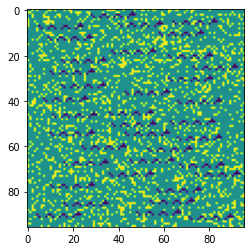

In [114]:
from scipy import signal
from matplotlib.pyplot import imshow
%matplotlib inline

def no_flip(x):
    return x

def get_slice(tile, direction):
    if direction == 0:
        return tile[0, :]
    elif direction == 1: 
        return tile[:, -1]
    elif direction ==2:
        return tile[-1,:]
    else:
        return tile[:, 0]
    
def get_position(direction, position):
    if direction == 0:
        return (position[0]-1, position[1])
    elif direction == 1:
        return (position[0], position[1]+1)
    elif direction == 2:
        return (position[0]+1, position[1])
    else:
        return (position[0], position[1]-1)
    
def check_match(tile, neighbour, position):
    for border_type, border in enumerate(get_borders(tile)):
        for rotations in range(4):
            rotated = np.rot90(neighbour, k=rotations)
            if np.array_equal(border, get_slice(rotated, opposite(border_type))):
                return rotated, get_position(border_type, position)
            elif np.array_equal(border, np.flip(get_slice(rotated, opposite(border_type)))):
                if border_type % 2 == 0:
                    return np.fliplr(rotated), get_position(border_type, position) 
                else:
                    return np.flipud(rotated), get_position(border_type, position) 


def opposite(direction):
    return (direction+2)%4

def arrange_tiles(tiles, tile_no, neighbours, visited, altered=None, position=(0,0)):
    if altered is None:
        altered = set()
    if position not in visited:
        visited[position] = tiles[tile_no][1:-1, 1:-1] == "#"
        
        for neighbour in neighbours[tile_no].values():
            rotated, nb_pos = check_match(tiles[tile_no], tiles[neighbour], position)
            if neighbour not in altered:
                altered.add(neighbour)
                tiles[neighbour] = rotated
                            
            arrange_tiles(tiles, neighbour, neighbours, visited, altered, nb_pos)


layout={}
tiles = read_tiles("../data/tiles.txt")
arrange_tiles(tiles, list(tiles.keys())[0] , neighbours, layout)

min_i =  min_j = 300
max_i = max_j = -300
for k in layout:
    min_i = min(min_i, k[0])
    min_j = min(min_j, k[1])
    max_i = max(max_i, k[0])
    max_j = max(max_j, k[1])

height=(max_i + 1 - min_i) * 8
width=(max_j + 1 - min_j) * 8

image = np.empty((height, width))
for i in range(min_i, max_i+1):
    for j in range(min_j, max_j+1):
        n_i = i-min_i
        n_j = j-min_j
        image[n_i*8:(n_i+1)*8, n_j*8:(n_j+1)*8] = layout[(i, j)]


filtr = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                   [1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1],
                   [0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0]])

filter_h, filter_w = filtr.shape

monster_img = None
for rotations in range(4):
    rotated_image = np.rot90(image, k=rotations)
    height, width = rotated_image.shape

    count_rot = 0
    for i in range(height - filter_h):
        for j in range(width - filter_w):
            if np.array_equal(np.logical_and(rotated_image[i:i+filter_h, j:j+filter_w], filtr), filtr):
                count_rot += 1
    if count_rot != 0:
        monster_img = rotated_image
        break

    
    count_lr = 0
    flipped_lr = np.fliplr(rotated_image)
    height, width = flipped_lr.shape

    for i in range(height - filter_h):
        for j in range(width - filter_w):
            if np.array_equal(np.logical_and(flipped_lr[i:i+filter_h, j:j+filter_w], filtr), filtr):
                count_lr += 1
    
    if count_lr != 0:
        monster_img = flipped_lr
        break       

                
    count_ud = 0
    flipped_ud = np.flipud(rotated_image)
    height, width = flipped_ud.shape
    for i in range(height - filter_h):
        for j in range(width - filter_w):
            if np.array_equal(np.logical_and(flipped_ud[i:i+filter_h, j:j+filter_w], filtr), filtr):
                count_ud += 1
            
    if count_ud != 0:
        monster_img = flipped_ud
        break
        
height, width = monster_img.shape
for i in range(height - filter_h):
    for j in range(width - filter_w):
        if np.array_equal(np.logical_and(monster_img[i:i+filter_h, j:j+filter_w], filtr), filtr):
            monster_img[i:i+filter_h, j:j+filter_w][np.where(filtr)] = -1

#image is a numpy array
imshow(monster_img)
np.count_nonzero(monster_img == 1)






### Day 21

In [163]:
def read_ingredients(file_name):
    strings = open(file_name, "r").readlines()
    allergens = {}
    ingredients = set()
    items = []
    for string in strings:
        item_ingredients, item_allergens = string.split("(contains ")
        item_ingredients = set(item_ingredients.lstrip().rstrip().split(" "))
        items.append(item_ingredients)
        ingredients = ingredients.union(item_ingredients)
        for allergen in item_allergens.replace(" ", "").rstrip().rstrip(")").split(","):
            if allergen in allergens:
                allergens[allergen] = allergens[allergen].intersection(item_ingredients)
            else:
                allergens[allergen] = item_ingredients
        
    return allergens, ingredients, items

        
allergens, ingredients, items = read_ingredients("../data/ingredients.txt")

ingredients_with_allergens = set()
for allergen_ingredients in allergens.values():
    ingredients_with_allergens = ingredients_with_allergens.union(allergen_ingredients)
    
ingredients_without_allergens = ingredients - ingredients_with_allergens

count = 0
for item in items:
    for ingredient_wo_allergen in ingredients_without_allergens:
        if ingredient_wo_allergen in item:
            count += 1
print(count)


2627


In [164]:
sorted_allergens = {k: v for k, v in sorted(allergens.items(), key=lambda item: len(item[1]))}
single_allergen = list(sorted_allergens.keys())[0]

ingredient_allergen = {}
while single_allergen is not None:
    ingredient = list(sorted_allergens[single_allergen])[0]
    ingredient_allergen[ingredient] = single_allergen
    del sorted_allergens[single_allergen]
    for allergen in sorted_allergens.keys():
        if ingredient in sorted_allergens[allergen]:
            sorted_allergens[allergen].remove(ingredient)
    sorted_allergens = {k: v for k, v in sorted(sorted_allergens.items(), key=lambda item: len(item[1]))}
    if sorted_allergens:
        single_allergen = list(sorted_allergens.keys())[0]
    else:
        break
        
sorted_ingredients = {k: v for k, v in sorted(ingredient_allergen.items(), key=lambda item: item[1])}
print(allergens)
print(",".join(sorted_ingredients.keys()))

{'fish': {'dgsdtj'}, 'peanuts': {'sjcvsr'}, 'soy': {'vkdxfj'}, 'eggs': {'hn'}, 'nuts': {'kpksf'}, 'sesame': {'bstzgn'}, 'shellfish': {'kmmqmv'}, 'wheat': {'bsfqgb'}}
{'hn': 'eggs', 'dgsdtj': 'fish', 'kpksf': 'nuts', 'sjcvsr': 'peanuts', 'bstzgn': 'sesame', 'kmmqmv': 'shellfish', 'vkdxfj': 'soy', 'bsfqgb': 'wheat'}
hn,dgsdtj,kpksf,sjcvsr,bstzgn,kmmqmv,vkdxfj,bsfqgb


### Day 22

In [3]:
from collections import deque

def read_cards(file_name):
    with open(file_name, 'r') as file:
        data = file.read()
        
    players = data.replace(" ", "").replace(":", "").replace("Player1", "").replace("Player2", "").split("\n\n")
    player1 = [int(c) for c in players[0].lstrip().split("\n")]
    player2 = [int(c) for c in players[1].lstrip().rstrip().split("\n")]
    
    return deque(player1), deque(player2) 

In [ ]:
p1, p2 = read_cards("../data/cards.txt")
while p1 and p2:
    c1 = p1.popleft()
    c2 = p2.popleft()
    
    if c1 > c2:
        p1.append(c1)
        p1.append(c2)
    else:
        p2.append(c2)
        p2.append(c1)

score = 0
if p2:
    for i in range(len(p2)):
        score += p2[i]*(len(p2)-i)
else:
    for i in range(len(p1)):
        score += p1[i]*(len(p1)-i)
        
print(score)

In [23]:
import itertools    


def recursive_combat(p1, p2, game=0, vis=False):
    if vis:
        print("game", game)
    states = set()
    while p1 and p2:
        state_str = ",".join([str(c) for c in p1]) +" "+ ",".join([str(c) for c in p2])
        if state_str in states:
            return True
        else:
            states.add(state_str)

            c1 = p1.popleft()
            c2 = p2.popleft()

            if vis:
                print("p1 plays", c1)
                print("p2 plays", c2)
            if c1 <= len(p1) and c2 <= len(p2):

                p1_wins = recursive_combat(deque(itertools.islice(p1, 0, c1)), deque(itertools.islice(p2, 0, c2)), game=game+1)
            elif c1 > c2:
                p1_wins = True
            else:
                p1_wins = False

        
        if p1_wins:
            p1.append(c1)
            p1.append(c2)
        else:
            p2.append(c2)
            p2.append(c1)

        if vis:
            print("p1:", p1, "p2:",  p2)
        
    if vis and game >0:
        print("back to game", game-1)
    if p1:
        return True
    else:
        return False

p1, p2 = read_cards("../data/cards.txt")
p1_won = recursive_combat(p1, p2)
score = 0
if p1_won:
    for i in range(len(p1)):
        score += p1[i]*(len(p1)-i)
else:
    for i in range(len(p2)):
        score += p2[i]*(len(p2)-i)

print(score)

        

35495


### Day 23

In [102]:
cups = [5,2,3,7,6,4,8,1,9]
# cups = [3,8,9,1,2,5,4,6,7]

moves = 100
current_idx=0
max_len=len(cups)
for i in range(moves):
    current_cup = cups[current_idx]
    destination = cups[current_idx] - 1

    end_idx = current_idx+4
    if end_idx >= len(cups):
        end_idx -= len(cups)
        cups_to_move = cups[current_idx+1:].copy() + cups[:end_idx].copy()

    else:
        cups_to_move = cups[current_idx+1:end_idx].copy()
        
    if end_idx < current_idx+1:
        del cups[current_idx+1:]
        del cups[:end_idx]
    else:
        del cups[current_idx+1:end_idx]
    
    while destination not in cups:
        if destination == 0:
            destination = max_len
            continue
            
        destination -= 1
    
    drop_off = cups.index(destination)
    cups = cups[:drop_off+1] + cups_to_move + cups[drop_off+1:]
    current_idx = (cups.index(current_cup) + 1)%max_len

i = cups.index(1)
print ("".join([str(c) for c in (cups[i:] + cups[:i])]).replace("1",""))

49576328


In [152]:
def print_list(n):
    print("List: ", end=' ')
    while n.next is not None:
        print(n.cup_no, end=',')
        n = n.next
    print(n.cup_no)

def find_answer(n):
    while n.next is not None:
        if n.cup_no == 1:
            return n.next.cup_no*n.next.next.cup_no
        n = n.next
    

class Node():
    def __init__(self, cup_no):
        self.cup_no = cup_no
        self.next = None
        
    def __repr__(self):
        string = "Node:" + str(self.cup_no) + "-->"
        if self.next is not None:
            string += str(self.next.cup_no)
        return  string
    
    def __str__(self):
        string = "Node:" + str(self.cup_no) + "-->"
        if self.next is not None:
            string += str(self.next.cup_no)
        return  string

# cups = [3,8,9,1,2,5,4,6,7]
cups = [5,2,3,7,6,4,8,1,9]
nodes={}

prev=None
for c in cups:
    n = Node(c)
    if prev is not None:
        prev.next = n
    nodes[c] = n
    prev = n

for c in range(10,1000001):
    n = Node(c)
    if prev is not None:
        prev.next = n
    nodes[c] = n
    prev = n

max_value = len(nodes)

end = prev
start = nodes[next(iter(nodes))]
moves =10*max_value
for i in range(moves):
#     print("Start", start)
#     print("End", end)
    
    destination = start.cup_no - 1
    if destination == 0:
        destination = max_value
        
    cups_to_search_start = start.next
#     print("chunk start", cups_to_search_start)
    cups_to_search_mid = cups_to_search_start.next
    cups_to_search_end = cups_to_search_mid.next
    
#     print("chunk end", cups_to_search_end)

    unavailable = {cups_to_search_start.cup_no, cups_to_search_mid.cup_no, cups_to_search_end.cup_no}
        
    while destination in unavailable:
        destination -=1
        if destination == 0:
            destination = max_value
            
    insert_node = nodes[destination]
#     print("Insert node", insert_node)
    
    if insert_node.cup_no == end.cup_no:
        end = insert_node        
    
    end.next = start # The old end points at the old start point
#     print("old end", end)
    end = start # The old start is now the end
    end.next = None # The new end points to None
#     print("new end", end)
    start = cups_to_search_end.next # The new start is the point after the chunk
#     print("new start", start)
    cups_to_search_end.next = insert_node.next # The end of the chunk points to where the insert node pointed
#     print("End of chunk", cups_to_search_end)
    insert_node.next = cups_to_search_start # The insert node points to the start of the chunk
#     print("previous insert point", cups_to_search_end)

# print_list(start)
print(find_answer(start))


511780369955


### Day 24


In [270]:
def read_floor_tiles(file_name):
    with open(file_name, 'r') as file:
        strings = file.readlines()
        tiles = []
        for string in strings:
            ch = ""
            directions = []
            for c in string.rstrip():
                ch += c
                if c == "n" or c == "s":
                    continue

                directions.append(ch)
                ch = ""
            
            tiles.append(directions)
            
        return tiles
    
def find_tile_coordinates(directions):
    x = 0 # Lines with NW direction (main diagonal)
    y = 0 # Lines with NE direction (off diagonal)
    z = 0 # Horizontal lines

    for direction in directions:
        if direction == "e":# We are still on the same horizontal line
            x += 1 
            y -= 1 
        elif direction == "w":# We are still on the same horizontal line
            x -= 1 
            y += 1 
        elif direction == "ne": # We are still on the same off diagonal
            z -= 1
            x += 1
        elif direction == "sw":
            z += 1
            x -= 1
        elif direction == "nw":
            z -= 1
            y += 1 
        elif direction == "se":
            z += 1
            y -= 1 
            
    return (x,y,z)
            
        

        
                


In [308]:
tiles = read_floor_tiles("../data/floor_tiles.txt")

tiles_changes = {}
for tile in tiles:
    tile_position = find_tile_coordinates(tile)
    if tile_position not in tiles_changes:
        tiles_changes[tile_position] = 1
    else:
        tiles_changes[tile_position] += 1
                
count = 0
for tile_coord, changes in tiles_changes.items():
    if changes%2:
        count += 1
        
print(count)

495


In [309]:
def get_neighbouring_tiles(tile, shape):
    neighbourhood = [(0,-1, 1), (0, 1, -1), (-1, 0 , 1), (1, 0 , -1), (-1, 1, 0), (1,  -1, 0)]
    neighbouring = []
    for n in neighbourhood:
        x = tile[0]+n[0]
        y = tile[1]+n[1]
        z = tile[2]+n[2]
        if x >= shape[0] or y >= shape[1] or z >= shape[2]:
            continue
        
        neighbouring += [(x, y, z)]
    return neighbouring

import numpy as np
min_coords = [1000, 1000, 1000]
max_coords = [-1000, -1000, -1000]
for coords in tiles_changes:
    for i in range(3):
        min_coords[i] = min(min_coords[i], coords[i])
        max_coords[i] = max(max_coords[i], coords[i])

floor_shape = [max_coords[i] - min_coords[i] + 1 for i in range(3)]

floor = np.zeros(floor_shape)

for tile_pos, changes in tiles_changes.items():
    adjusted_floor_pos = (tile_pos[0]-min_coords[0], tile_pos[1]-min_coords[1], tile_pos[2]-min_coords[2])
    if changes%2:
        floor[adjusted_floor_pos] = 1
#         print(tile_pos, "adjusted to ", adjusted_floor_pos, "with value", floor[adjusted_floor_pos])

days = 100

offset = np.array(min_coords)
for day in range(days):
    change_idx = {}
    floor = np.pad(floor, [(1, 1), (1, 1), (1,1)], mode='constant', constant_values=0)
    offset -= 1 # Since we expand we need to offset with -1 on all axes
    floor_shape = floor.shape
    for i in range(floor_shape[0]):
        for j in range(floor_shape[1]):
            for k in range(floor_shape[2]):
                if i + j + k != -offset.sum(): #This is not part of our flooring
                    continue
                    
                black = 0
#                 print("Ns for ", (i, j, k))
                for n in get_neighbouring_tiles((i, j, k), floor_shape):
#                     print(n, floor[n])
                    black += int(floor[n])
#                 print(black)


                
                if floor[i, j, k] == 1 and (black == 0 or black > 2):
                    change_idx[(i,j,k)] = 0
                if floor[i, j, k] == 0 and black == 2:
                    change_idx[(i,j,k)] = 1

    for k, v in change_idx.items():
        floor[k] = v
        
    depth_active, row_active, col_active = np.where(floor == 1)
    
    floor=floor[depth_active.min():depth_active.max()+1, row_active.min():row_active.max()+1, col_active.min():col_active.max()+1]    
    offset += np.array([depth_active.min(), row_active.min(), col_active.min()])
    
print(np.count_nonzero(floor))

4012


# Christmas

In [314]:
def public_key(number, loop_size):
    value = 1
    for i in range(loop_size):
        value *=  number
        value = value%20201227
    return value

public_key(7, 8)

5764801

In [328]:
card_public_key = 8987316
door_public_key = 14681524

def find_loop(subject_num, public_key, start_val=1, divisor=20201227):
    loops = 1
    value = 1
    while True:
        value = (value*subject_num)%20201227
        if value == public_key:
            break
        loops += 1
    return loops


card_key = 8987316
door_key = 14681524
card_loops = find_loop(7, card_public_key)
door_loops = find_loop(7, door_public_key)

print(public_key(door_key, card_loops))


15217943
